# **FCA - UNICAMP**
**Disciplina: LE610 A - Sistemas Apoio à Decisão e ao Aprendizado Máquina**

Projeto 2: Escolha Engenharia

Métodos: AHP-Promethee II & AHP-Topsis

Alunos:
---

---

Henrique Maximino Barros       
Marcos de Pinho Tavares Proença


In [ ]:
pip install pymcdm

In [ ]:
pip install -U pymoo

In [3]:
#Importando os pacotes do Python que serão utilizados
import numpy as np  # pacote numpy importado com o apelido de np
import cmath # pacote cmath faz operações com numeros complexos

from pymcdm import normalizations as norm, helpers, visuals
from pymcdm.methods import PROMETHEE_II, TOPSIS
from pymcdm.helpers import rrankdata, rankdata

from pymoo.mcdm.pseudo_weights import PseudoWeights
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.petal import Petal
from tabulate import tabulate
import pandas as pd

import matplotlib.pyplot as plt
import networkx as nx

In [4]:
#Matriz de comparação par a par entre os critérios
C =  [[    1,  1/3,    1/5,     1/2,    1/8,    1/4,    1/2,    1/6],
      [    3,    1,    1/2,       2,    1/5,    1/2,      2,    1/3],
      [    5,    2,      1,       3,    1/3,      2,      5,    1/2],
      [    2,  1/2,    1/3,       1,    1/6,    1/2,      2,    1/4],
      [    8,    5,      3,       6,      1,      4,      7,      2],
      [    4,    2,    1/2,       2,    1/4,      1,      3,    1/2],
      [    2,  1/2,    1/5,     1/2,    1/7,    1/3,      1,    1/5],
      [    6,    3,      2,       4,    1/2,      2,      5,      1]] # matriz 

C

[[1, 0.3333333333333333, 0.2, 0.5, 0.125, 0.25, 0.5, 0.16666666666666666],
 [3, 1, 0.5, 2, 0.2, 0.5, 2, 0.3333333333333333],
 [5, 2, 1, 3, 0.3333333333333333, 2, 5, 0.5],
 [2, 0.5, 0.3333333333333333, 1, 0.16666666666666666, 0.5, 2, 0.25],
 [8, 5, 3, 6, 1, 4, 7, 2],
 [4, 2, 0.5, 2, 0.25, 1, 3, 0.5],
 [2, 0.5, 0.2, 0.5, 0.14285714285714285, 0.3333333333333333, 1, 0.2],
 [6, 3, 2, 4, 0.5, 2, 5, 1]]

In [5]:
#Cálculo do autovalor e do autorvetor de C
autovalor, autovetor = np.linalg.eig(C)

#Considerar apenas a parte real do autovalor
autovalor_real = autovalor.real
autovetor = autovetor.real

#Encontrar o maior autovalor e sua posição
lambda_max = np.amax(autovalor_real) # maior autovalor
lambda_ind = np.argmax(autovalor_real) # posição do maior autovalor
print("O maior autovalor (lambda_max) é:", lambda_max)
print(" ")
print("Ele está na posição:", lambda_ind, "do vetor")

O maior autovalor (lambda_max) é: 8.168601853233685
 
Ele está na posição: 0 do vetor


In [6]:
#Programando o método do autovalor como uma função
def ahp(C):
  autovalor, autovetor=np.linalg.eig(C)
  autovalor_real = autovalor.real
  autovetor = autovetor.real
  lambda_max = np.amax(autovalor_real) # maior autovalor
  lambda_ind=np.argmax(autovalor_real) # posição do maior autovalor
  vetor_P=autovetor[:, lambda_ind] #pega o autovalor correspondente a lambda_max
  vetor_P = vetor_P/sum(vetor_P) # w é o vetor de pesos normalizado
  RI_list = [0,0,0.58,0.90,1.12,1.24,1.32,1.41,1.45] # valores de RI pré-definidos
  n = len(C) # número de linhas de C
  CI = (lambda_max - n)/(n-1)
  RC = CI/RI_list[n-1]
  print("A razão de consistência é ", RC)
  print(" ")
  if RC <= 0.1:
    print("A matriz é consistente")
  else:
    print('\033[91m'+"Atenção:"+'\033[0m'+ "a matriz NÃO É consistente - revisar a comparação par-a-par.")
  print(" ")
  print("O vetor de prioridades é v:", vetor_P)
  print(" ")
  print("O maior autovalor é:", lambda_max)
  print(" ")

  return (vetor_P, lambda_max)

In [7]:
vetor_P, lambda_max = ahp(C)

A razão de consistência é  0.0170822546336054
 
A matriz é consistente
 
O vetor de prioridades é v: [0.02849889 0.07449526 0.14945844 0.05335237 0.34455385 0.10454329
 0.03852869 0.20656921]
 
O maior autovalor é: 8.168601853233685
 


In [8]:
criterios = ["Graduados/ano", "Salário anual(começo da carreira)",
             "Salário anual (meio da carreira)","Pontuação demanda",
             "Empregos disponíveis", "Ambiente de trabalho",
             "Dificuldade do curso", "Flexibilidade"]

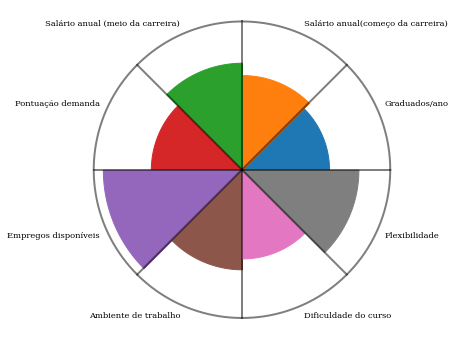

In [9]:
plot = Petal(bounds=(-0.5, 0.4), reverse=False, labels=criterios)
plot.add(vetor_P)
plot.show()

In [10]:
# Define decision matrix (8 criteria, 15 alternative)
matrix = np.array([[  987.00,	  72300.00,     130400.00,	 14.51, 	  121.00,	  5.00,	  3.00,	  2.00],
                   [ 1063.00,	  59900.00,      98400.00,	 48.11, 	  421.00,	  3.00,	  2.00,	  1.00],
                   [   60.00,	  69400.00,     112900.00,	127.52, 	77909.00,	  5.00,	  3.00,	  2.00],
                   [ 4021.00,	  69900.00,     118500.00,	100.00, 	 1048.00,	  3.00,	  4.00,	  2.00],
                   [ 6926.00,	  66700.00,     114600.00,	100.00, 	  984.00,	  3.00,	  5.00,	  1.00],
                   [10759.00,   72800.00,     127200.00,	101.02, 	 4236.00,	  2.00,	  3.00,	  3.00],
                   [13337.00,   60900.00,     102900.00,	103.56, 	11295.00,	  1.00,	  3.00,	  3.00],
                   [ 7290.00,	  72900.00,     120000.00,	107.06, 	21010.00,	  5.00,	  4.00,	  3.00],
                   [16766.00,   70600.00,     119900.00,	109.68, 	28302.00,	  2.00,	  5.00,	  4.00],
                   [ 5246.00,	  67300.00,     110000.00,	101.44, 	 5395.00,	  3.00,	  3.00,	  5.00],
                   [  439.00,	  72600.00,     123600.00,	 37.37, 	  327.00,	  1.00,	  4.00,	  1.00],
                   [ 1520.00,   69300.00,     106600.00,	 53.03, 	  464.00,	  3.00,	  3.00,	  3.00],
                   [32306.00,   66800.00,     110600.00,	 90.39, 	15982.00,	  2.00,	  3.00,	  5.00],
                   [  572.00,   72400.00,     122200.00,	 40.34, 	  353.00,	  1.00,	  5.00,	  1.00],
                   [ 2124.00,	  94500.00,     176900.00,	 34.40, 	  301.00,	  1.00,	  5.00,	  1.00]], dtype = "float64")

# Define weights and types
weights = np.array(vetor_P)
types = np.array([-1, 1, 1, 1, 1, 1, -1, 1])

Engenharias = ["Engenharia de Sistemas",  "Engenharia Agrícola",                "Engenharia de Software",   "Engenharia Aeroespacial",
               "Engenharia Biomédica",    "Engenharia Química",                 "Engenharia Civil",         "Engenharia de Computação",
               "Engenharia Elétrica",     "Engenharia de Produção/Manufatura",  "Engenharia Marinha",       "Engenharia de Materiais",
               "Engenharia Mecânica",     "Engenharia Nuclear",                 "Engenharia de Petróleo"]

#Promethee I

In [11]:
def promethee_I_visualization(Fp, Fm, legenda):
    fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
    ax.set_xlim(-0.51, 0.51)
    ax.set_ylim(-0.51, 0.51)
    ax.axis('off')

    ax.plot([0.5, 0.5], [-0.5, 0.5], 'k', linewidth=3)
    ax.plot([-0.5, -0.5], [-0.5, 0.5], 'k', linewidth=3)
    ax.plot([0, 0], [-0.5, 0.5], 'k',
            alpha=0.5, linewidth=1, linestyle='--')

    ax.text(-0.61, 0, 'Phi+', fontsize='large')
    ax.text(-0.56, 0.5, '1.0')
    ax.text(-0.56, -0.5, '0.0')

    ax.text(0.52, 0, 'Phi-', fontsize='large')
    ax.text(0.51, -0.5, '1.0')
    ax.text(0.51, 0.5, '0.0')

    for i, (fp, fm) in enumerate(zip(Fp, Fm)):
        ax.plot([-0.5, 0.5], [-0.5 + fp, 0.5 - fm], label = legenda[i] )
    plt.legend(loc = [1.2,0])


def promethee_II_vizualization(Fi, legenda):
    fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
    ax.set_xlim(-0.51, 0.51)
    ax.set_ylim(-0.51, 0.51)
    ax.axis('off')

    ax.plot([0, 0], [-0.5, 0.5], 'k', linewidth=5)
    ax.text(0.02, 0.5, '1.0')
    ax.text(0.02, 0, '0.0')
    ax.text(0.02, -0.5, '-1.0')

    for i in np.arange(-0.5, 0.51, 0.25):
        ax.plot([-0.02, 0.02], [i, i], 'k')
    

    for i, fi in enumerate(Fi):
        ax.plot([-0.1, 0.1], [fi/2, fi/2], label= legenda[i])
    plt.legend(loc = [1,0])

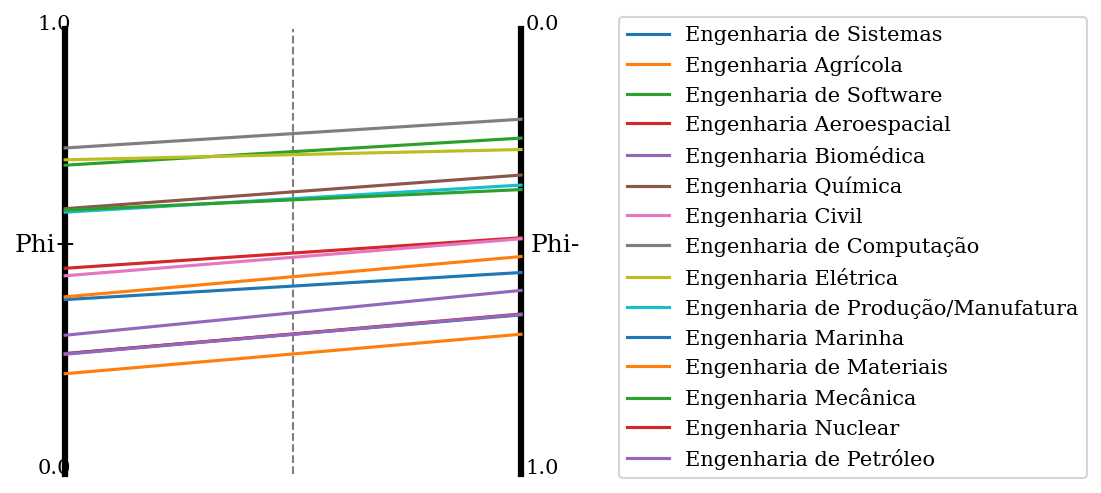

In [12]:
#Promethee II - Fluxos Positivos e Negativos
promethee = PROMETHEE_II('usual')
Fp, Fm = promethee(matrix, weights, types, promethee_I = True)

promethee_I_visualization(Fp, Fm, Engenharias)

#Fluxos 
lista_de_tuplas = list(zip(Fp, Fm))
flows = pd.DataFrame(lista_de_tuplas, columns=["Fluxo Positivo", 'Fluxo Negativo'], index = Engenharias)
flows = flows.sort_values(['Fluxo Positivo'], ascending=False)

In [13]:
flows.style.background_gradient(cmap = 'Blues')

,Fluxo Positivo,Fluxo Negativo
Engenharia de Computação,0.733116,0.202180
Engenharia Elétrica,0.706422,0.270387
Engenharia de Software,0.694357,0.244686
Engenharia Química,0.596426,0.327862
Engenharia Mecânica,0.593200,0.360598
Engenharia de Produção/Manufatura,0.588483,0.350380
Engenharia Aeroespacial,0.462234,0.469072
Engenharia Civil,0.445401,0.471419
Engenharia de Materiais,0.397962,0.511391
Engenharia de Sistemas,0.391712,0.547331


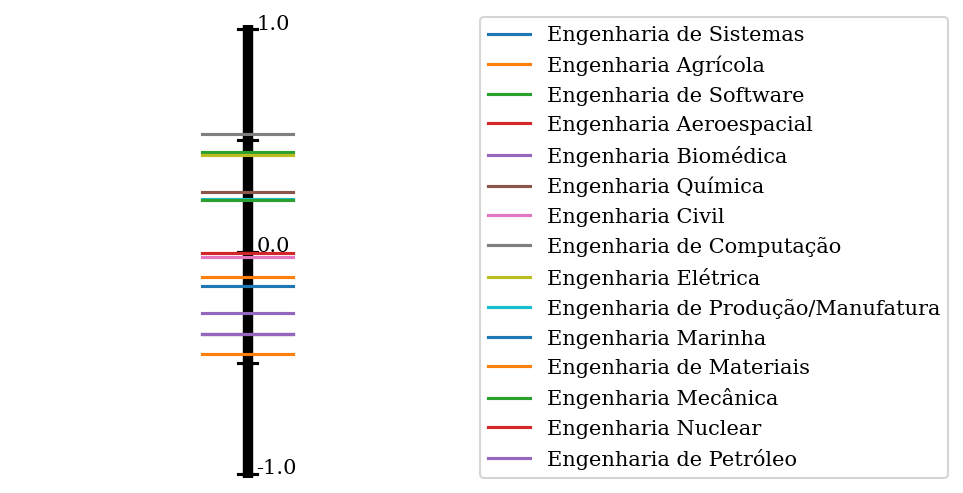

In [14]:
#Promethee II - Fluxo Total 
promethee = PROMETHEE_II('usual')
Fi = promethee(matrix, weights, types)
promethee_II_vizualization(Fi, Engenharias)

distance = pd.DataFrame(Fi)

df = pd.DataFrame(Fi, index = Engenharias).rename({0: 'Fluxo Total'}, axis='columns').sort_values(['Fluxo Total'], ascending=False)

rank = []
for i in range(len(df)):
  rank.append(i+1)

df["Classificação"] = rank

In [15]:
df.head(16)

,Fluxo Total,Classificação
Engenharia de Computação,0.530935,1
Engenharia de Software,0.449671,2
Engenharia Elétrica,0.436036,3
Engenharia Química,0.268565,4
Engenharia de Produção/Manufatura,0.238103,5
Engenharia Mecânica,0.232602,6
Engenharia Aeroespacial,-0.006838,7
Engenharia Civil,-0.026018,8
Engenharia de Materiais,-0.113429,9
Engenharia de Sistemas,-0.155619,10


#TOPSIS

In [16]:
topsis_methods = {
    'minmax': TOPSIS(norm.minmax_normalization),
    'max':TOPSIS(norm.max_normalization),
    'sum': TOPSIS(norm.sum_normalization),
    'vector':TOPSIS(norm.vector_normalization),
}

results = {}
for name, function in topsis_methods.items():
    results[name] = function(matrix, weights, types)

df = pd.DataFrame(results, index = Engenharias).sort_values(["minmax", "max" , "sum", "vector"], ascending = [False,False,False,False])
df.style.highlight_max(color = "blue").set_precision(3)

C:\Users\Henrique\AppData\Local\Temp\ipykernel_7144\2783673208.py:13: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.style.highlight_max(color = "blue").set_precision(3)


,minmax,max,sum,vector
Engenharia de Software,0.644,0.725,0.901,0.835
Engenharia Elétrica,0.438,0.433,0.367,0.388
Engenharia Mecânica,0.414,0.389,0.236,0.288
Engenharia de Computação,0.386,0.368,0.278,0.306
Engenharia de Produção/Manufatura,0.386,0.352,0.146,0.227
Engenharia de Petróleo,0.288,0.164,0.042,0.097
Engenharia Química,0.268,0.226,0.090,0.141
Engenharia de Sistemas,0.261,0.217,0.071,0.132
Engenharia Civil,0.256,0.246,0.157,0.186
Engenharia de Materiais,0.243,0.216,0.073,0.134


In [17]:
results = {}
for name, function in topsis_methods.items():
    results[name] = rankdata(function(matrix, weights, types), reverse=True)

df = pd.DataFrame(results, index = Engenharias).sort_values([ "max" , "sum", "vector"], ascending = [True,True,True])
df.style.background_gradient(cmap='Blues').set_precision(0)

C:\Users\Henrique\AppData\Local\Temp\ipykernel_7144\2928487199.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.style.background_gradient(cmap='Blues').set_precision(0)


,minmax,max,sum,vector
Engenharia de Software,1,1,1,1
Engenharia Elétrica,2,2,2,2
Engenharia Mecânica,3,3,4,4
Engenharia de Computação,4,4,3,3
Engenharia de Produção/Manufatura,5,5,6,5
Engenharia Civil,9,6,5,6
Engenharia Química,7,7,7,7
Engenharia de Sistemas,8,8,9,9
Engenharia de Materiais,10,9,8,8
Engenharia Aeroespacial,11,10,10,10


In [19]:
"""
print(tabulate([[name, *np.round(pref, 3)] for name, pref in results.items()],
              headers=['Method'] + Engenharias))


print(tabulate([[name, *rankdata(pref, reverse=True)] for name, pref in results.items()],
              headers=['Method'] + Engenharias))
"""

"\nprint(tabulate([[name, *np.round(pref, 3)] for name, pref in results.items()],\n              headers=['Method'] + Engenharias))\n\n\nprint(tabulate([[name, *rankdata(pref, reverse=True)] for name, pref in results.items()],\n              headers=['Method'] + Engenharias))\n"